# Programming in Python, 1TD327, 5hp

Lecture 5: Advanced Topics in Python

- Cheng Gong
- Email: cheng.gong@it.uu.se
- Office: ITC 2448

<br>


Source available: [github.com/enigne/ProgramminginPython](https://github.com/enigne/ProgramminginPython)

## Last week

1. Dictionary
2. File I/O
3. matplotlib

### About MINI project 1

- Don't spend too much time on the smooth functions, you should have done them in lesson 6. If not, they are still in the lowest priority of this MINI project.
- Be careful, 'geo' appears in two different places: at the first row and as a country code for Georgia. This is made on purpose. Such a situation is very common in real applications. You should be able to treat the first row of the `csv` file differently than the others. 
- In order to pass this assignment, you should be able to modify you code and present the data differently. One example might be to change the year of population vs. CO2 emission to the year when you were born. So, when you write your code, try to make it flexible with all the possible parameters.

### About MINI project 2

- It is now available [here](http://www.it.uu.se/edu/course/homepage/prog1/english/lessons/le10/MINI2.html)
- Put all the functions in the `epidemic` module and you should be able to use the code in Task B and C to reproduce the same results.
- The examination will also require you to modify the module or add additional features into the module, so make sure your simulation can be run efficiently(say, it should finish within 10 seconds). 

## Today -- Advanced Topics in Python

1. `enumerate()`
2. More about classes
3. Iterators
4. Useful libraries

**Next lecture (Dec, 9) -- Review of the course and examples of the exam**

### `enumerate()`

The `enumerate()` method adds counter to an iterable object to make an enumerate object, and returns it.

#### Example 1

In [1]:
country = ['dnk', 'fin', 'isl', 'nor', 'swe']
enumCountry = enumerate(country)
print(enumCountry)

In [2]:
print(list(enumCountry))

[(0, 'dnk'), (1, 'fin'), (2, 'isl'), (3, 'nor'), (4, 'swe')]


In [3]:
enumCountry = enumerate(country, 100)
print(list(enumCountry))

[(100, 'dnk'), (101, 'fin'), (102, 'isl'), (103, 'nor'), (104, 'swe')]


#### Example 2
Use in the loop

In [4]:
country = ['dnk', 'fin', 'isl', 'nor', 'swe']

for item in enumerate(country):
    print(item, end=' | ')

(0, 'dnk') | (1, 'fin') | (2, 'isl') | (3, 'nor') | (4, 'swe') | 

In [5]:
for count, item in enumerate(country):
    print(count, item, end=' | ')

0 dnk | 1 fin | 2 isl | 3 nor | 4 swe | 

In [6]:
for count, item in enumerate(country, 100):
    print(count, item, end=' | ')

100 dnk | 101 fin | 102 isl | 103 nor | 104 swe | 

### Class

Why use class?

#### Example 1

In [7]:
class Cat:
    def speak(self):
        print('Meow!')

class Dog:
    def speak(self):
        print('Woof!')
        
class Cow:
    def speak(self):
        print('Moo!')

In [8]:
zoo = [Cat(), Dog(), Cow()]
for animal in zoo:
    animal.speak()

Meow!
Woof!
Moo!


#### Example 2

In [9]:
class Point:
    def __init__(self, x = 0, y = 0):
        self.x = x
        self.y = y

``` python
>>> p1 = Point(1, 2)
>>> p2 = Point(2, 3)
>>> p1 + p2
```

``` python
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-10-961237203524> in <module>
      1 p1 = Point(1, 2)
      2 p2 = Point(2, 3)
----> 3 p1 + p2

TypeError: unsupported operand type(s) for +: 'Point' and 'Point'
```

The `+` operator is defined for `int`, `float`, `str`, even for `list`, but not for user defined classes.

In [10]:
print(1 + 2)
print('a' + 'b')
print([1, 3, 5] + ['a', 'b', 'd'])

3
ab
[1, 3, 5, 'a', 'b', 'd']


#### Overload
We need to **overload** the `+` sign for `class Point` with `__add__()` function.

In [11]:
class Point:
    def __init__(self, x = 0, y = 0):
        self.x = x
        self.y = y
    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Point(x, y)

In [12]:
p1 = Point(1, 2)
p2 = Point(2, 3)
print(p1 + p2)

We also need to **overload** the `__str__()` functio in `class Point`, to control how it gets printed.

In [13]:
class Point:
    def __init__(self, x = 0, y = 0):
        self.x = x
        self.y = y
    def __add__(self, other):
        x = self.x + other.x
        y = self.y + other.y
        return Point(x, y)
    def __str__(self):
        return f"({self.x}, {self.y})"

In [14]:
p1 = Point(1, 2)
p2 = Point(2, 3)
print(p1 + p2)

(3, 5)


#### Some remarks
- Indeead 
`p1+p2` is equivalent to `p1.__add__(p2)`.

- Other methods such as subtraction, multiplication, division, `<`, `>`, etc, can be found [here](https://docs.python.org/3/reference/datamodel.html#emulating-numeric-types).
``` python
__sub__()
__mul__()
__truediv__()
__lt__()
```

- These operations may not be valid for all the data types. 

``` python 
>>> [1, 2, 3] - [2]
```

``` python
---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
<ipython-input-15-ba8591ba67bb> in <module>
----> 1 [1, 2, 3] - [2]

TypeError: unsupported operand type(s) for -: 'list' and 'list'
```

### Recall the example for reading CSV file

In [15]:
import csv
with open('people.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        print(row)

['No', ' Name', ' country']
['1', ' Alex', ' USA']
['2', ' Erik', ' Sweden']
['3', ' Cheng', ' China']


Quiz: What will happen if you loop for `reader` twice?
``` python
import csv
with open('people.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        print('First loop:', row)
    for row in reader:
        print('Second loop:', row)
```

In [16]:
import csv

with open('people.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        print('First loop:', row)
    for row in reader:
        print('Second loop:', row)

First loop: ['No', ' Name', ' country']
First loop: ['1', ' Alex', ' USA']
First loop: ['2', ' Erik', ' Sweden']
First loop: ['3', ' Cheng', ' China']


### Iterators

- Iterators are objects that can be iterated upon. It will return one element at a time.
- In python, an iterator object must have the __iterator protocol__: `__iter__` and `__next__` methods.
- An object is called __iterable__ if we can get an iterator from it. Most of built-in containers in Python like: `list`, `dict`, `string` etc. are iterable. One can use `iter()` function to return an iterator from these objects.

#### Example 1

``` python 
my_list = [1, 8, 3]
my_iter = iter(my_list)
```
What will happen if we call the following functions?
``` python 
print(next(my_iter))
print(next(my_iter))
print(my_iter.__next__())
print(my_iter.__next__())
```

In [17]:
my_list = [1, 8, 3]
my_iter = iter(my_list)
print(next(my_iter))

1


In [18]:
print(next(my_iter))

8


In [19]:
print(my_iter.__next__())

3


``` python
print(my_iter.__next__())
```

``` python
---------------------------------------------------------------------------
StopIteration                             Traceback (most recent call last)
<ipython-input-58-4091dee71d9f> in <module>
----> 1 print(my_iter.__next__())

StopIteration: 
```

#### Example 2 -- Use for loop

In [20]:
for item in my_list:
    print(item)

1
8
3


How does the `for` loop work in this case?

In [21]:
# create an iterator object from that iterable
iter_obj = iter(my_list)
# infinite loop
while True:
    try:
        # get the next item
        item = next(iter_obj)
        # do the tasks in the for loop
        print(item)
    except StopIteration:
        # if StopIteration is raised, break from loop
        break

1
8
3


#### Build an iterator

In [22]:
class even:
    def __init__(self, max = 0):
        self.max = max

    def __iter__(self):
        self.n = 0
        return self

    def __next__(self):
        if self.n <= self.max:
            result = 2 * self.n
            self.n += 1
            return result
        else:
            raise StopIteration

- To build an iterator, we just need to implement the __iterator protocol__: `__iter__()` and `__next__()` methods.
- The `__iter__()` method returns the iterator object itself. If required, some initialization can be performed.
- The `__next__()` method returns the next item in the sequence. When reaching the end, and in subsequent calls, it must raise `StopIteration`.

In [23]:
for i in even(15):
    print(i, end=' ')

0 2 4 6 8 10 12 14 16 18 20 22 24 26 28 30 

#### Recall the generator we mentioned in Lecture 2

In [24]:
def even_generator_infinite():
    x = 0
    while True:
        if x % 2 == 0:
            yield x
        x += 1

In [25]:
even_gen = even_generator_infinite()
for i in range(15):
    print(next(even_gen), end=" ")

0 2 4 6 8 10 12 14 16 18 20 22 24 26 28 

####  Generator vs. Iterator

- `generator` function contains one or more yield statement, `iterator` is a class with `__iter__()` and `__next__()` methods.
- When `generator` is called, it returns an object (iterator).
- Methods like `__iter__()` and `__next__()` are implemented automatically in `generator`. But, you have to implement them in `iterator`.
- we can iterate through the items using `next()` for both of them.
- In `generator`, when the function terminates, `StopIteration` is raised automatically on further calls.

#### How to get the first row separately?
``` python
import csv
with open('people.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        print(row)
```

In [26]:
import csv

with open('people.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    firstRow = next(reader)
    print('First row:', firstRow)
    for row in reader:
        print('Other row:', row)

First row: ['No', ' Name', ' country']
Other row: ['1', ' Alex', ' USA']
Other row: ['2', ' Erik', ' Sweden']
Other row: ['3', ' Cheng', ' China']


### Some useful libraries

* [**NumPy**](https://numpy.org/) is a Python library for multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
* [**SciPy**](https://www.scipy.org/) is a Python library for scientific computing. It contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.
* [**Pandas**](https://pandas.pydata.org/) is a Python library for data manipulation and analysis. It offers data structures and operations for manipulating numerical tables and time series. 

Recommand reading: [Elegant SciPy](https://github.com/elegant-scipy/elegant-scipy)

### Array

Arrays are similar to lists, but can only contain data of the same type. However, arrays are much more suitable for mathematics because they support operations, such as `+` and `-`, on all elements in an array at the same time. To use arrays we need the **NumPy** library.

In [27]:
import numpy as np

In [28]:
a = np.array([1, 2, 3, 4])
print(a)

[1 2 3 4]


#### Array vs. list

* Access an element by index

In [29]:
print(a[0])

1


* Check the length

In [30]:
print(len(a))

4


* `numpy.array` is also mutable like `list`

In [31]:
b = a
b[0] = 10
print(a)

[10  2  3  4]


* Slicing

In [32]:
print(a[1:-1])

[2 3]


**NOTE**: a very important difference between slicing arrays and lists. Slicing a `list` returns a copy of that part, but slicing an `array` returns a **view** to that part. **Any changes on the view will modify the original array**.

In [33]:
a = np.array([1, 2, 3, 4, 5, 6])
b = a[0:3]
print("a before change:", a)
print("b before change:", b)
b[1] = 10
print("a after change:", a)
print("b after change:", b)

a before change: [1 2 3 4 5 6]
b before change: [1 2 3]
a after change: [ 1 10  3  4  5  6]
b after change: [ 1 10  3]


To avoid modification, you also need to use `copy()`
```python
b = a[0:3].copy()
```

#### Create an array

The most straightforward way is to use `numpy.array()`, but there are other ways:`

In [34]:
print(np.zeros(7))

[0. 0. 0. 0. 0. 0. 0.]


In [35]:
print(np.zeros(7) + 9)

[9. 9. 9. 9. 9. 9. 9.]


In [36]:
print(np.ones(7))

[1. 1. 1. 1. 1. 1. 1.]


In [37]:
print(np.ones(7)*9)

[9. 9. 9. 9. 9. 9. 9.]


In [38]:
print(np.arange(0, 6, 1))

[0 1 2 3 4 5]


In [39]:
print(np.linspace(0, 6, 10))

[0.         0.66666667 1.33333333 2.         2.66666667 3.33333333
 4.         4.66666667 5.33333333 6.        ]


#### Size of the array

The `array` has a variable `shape`

In [40]:
a = np.arange(1, 6, 1)
print(a)
print(a.shape)
print(a.shape[0])

[1 2 3 4 5]
(5,)
5


We can reshape (transpose) the array.

In [41]:
aT = np.reshape(a, (len(a), 1))
print(a)
print(aT)
print(aT.shape)

[1 2 3 4 5]
[[1]
 [2]
 [3]
 [4]
 [5]]
(5, 1)


#### Broadcasting

Perform operations on arrays of compatible shapes.

In [42]:
print(a*aT)

[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]


#### Mathematical operation

We can add, subtract, multiply, and divide `array` of **equal length**. The operation is performed on each element of each `array`.

In [43]:
a = np.array([1, 2, 3])
b = np.array([3, 2, 1])
print(a + b)

[4 4 4]


In [44]:
print(a - b)

[-2  0  2]


In [45]:
print(a * b, a / b, a**b)

[3 4 3] [0.33333333 1.         3.        ] [1 4 3]


In [46]:
print(a > b)

[False False  True]


#### Mathematical operation 2

We can add, subtract, multiply, and divide `array` by a single number:

In [47]:
a = np.array([1, 2, 3])
print(a + 1)

[2 3 4]


In [48]:
print(a - 2, a * 2, a ** 2)

[-1  0  1] [2 4 6] [1 4 9]


**Remark**: This utilizes the **broadcasting** feature of numpy array.

#### Example: optimization in NumPy

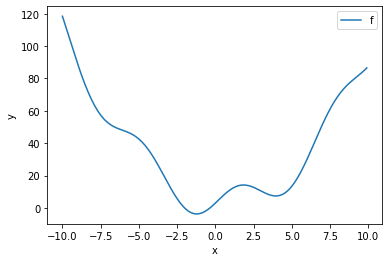

In [58]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.square(x) - x + 3.0 + 10.0 * np.sin(x)

xs1 = np.arange(-10.0, 10.0, 0.1)
ys1 = f(xs1)
plt.plot(xs1, ys1)
plt.xlabel('x')
plt.ylabel('y')
plt.legend('f')
plt.show()

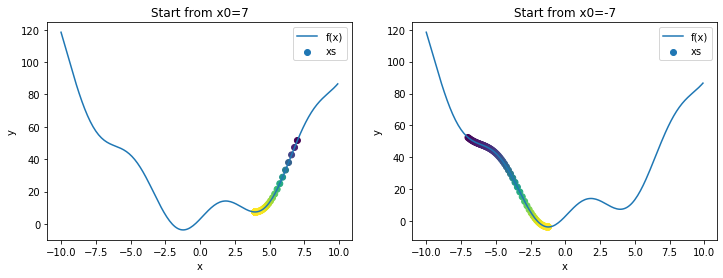

In [50]:
%run testOpt.py

#### The code for optimization:
``` python
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return np.square(x) - x + 3.0 + 10.0 * np.sin(x)

def f_prime(x):
    return 2.0 * x - 1.0 + 10.0 * np.cos(x)

def optimize(x_init, fun, derivative, step_length, iterations=100):
    xs = np.zeros((iterations+1,))
    xs[0] = x_init
    for i in range(iterations):
        x = xs[i]
        xs[i+1] = x - derivative(x) * step_length
    return (xs, fun(xs))

if __name__ == '__main__':
    x0 = [7, -7]
    x_exact = np.arange(-10.0, 10.0, 0.1)

    fig, axs = plt.subplots(1, 2, figsize=(12,4))
    for (i, ax) in enumerate(axs):
        (xs, ys) = optimize(x0[i], f, f_prime, 0.01)
        y_exact = f(x_exact)
        ax.plot(x_exact, y_exact)
        ax.scatter(xs, ys, c=-ys)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.legend(['f(x)','xs'])
        ax.set_title(f'Start from x0={x0[i]}' )
```

### SciPy

Recommand reading: [Elegant SciPy](https://github.com/elegant-scipy/elegant-scipy)

#### Example1 -- Let's try to use Scipy for the optimization

In [51]:
import scipy.optimize
from testOpt import f, f_prime

x = scipy.optimize.minimize(f, -7.0, method='L-BFGS-B', jac=f_prime)
print(x)

      fun: array([-3.68259411])
 hess_inv: <1x1 LbfgsInvHessProduct with dtype=float64>
      jac: array([-3.92453056e-07])
  message: b'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 11
      nit: 5
   status: 0
  success: True
        x: array([-1.21968903])


#### Example 2 -- The smooth function

Use a  uniform filter from *Multi-dimensional image processing* package of SciPy.

In [52]:
import scipy as sp
import scipy.ndimage

def smooth_sp(Im, n):
    return sp.ndimage.uniform_filter(Im, size=2*n+1, mode='nearest', output='float')

x = [1, 2, 6, 4, 5, 0, 1, 2]
print('smooth_sp(x, 1): ', list(smooth_sp(x, 1))) 
print('smooth_sp(x, 2): ', list(smooth_sp(x, 2)))

smooth_sp(x, 1):  [1.3333333333333333, 3.0, 4.0, 5.0, 3.0, 2.0, 1.0, 1.6666666666666667]
smooth_sp(x, 2):  [2.2, 2.8, 3.6, 3.4, 3.2, 2.4, 2.0, 1.4]


#### Other features and packages in Scipy
There are a variety of packages and sub-packages for efficient and accurate scientific computing:
- Linear algebra (solving system of equations, eigenvalues, ...)
- Geometry
- Image Processing
- Statistics and probability theory
- differential Equations

### Pandas -- Data importing

__Python Data Analysis Library__(`pandas`) is an open source, high-performance, easy-to-use data processing tool for Python.
The official website is (http://pandas.pydata.org/)[http://pandas.pydata.org/], the source code is available on Github: http://github.com/pandas-dev/pandas and the official documentation is at http://pandas.pydata.org/pandas-docs/stable/index.html

The main features of `pandas` are 
  - Robust IO tools for loading data from [**flat files**][flat-files](CSV and delimited), [**Excel files**][excel], [**databases**][db], and saving/loading data from the ultrafast [**HDF5 format**][hdfstore]
  - Automatic and explicit [**data alignment**][alignment]: objects can be explicitly aligned to a set of labels, or the user can simply ignore the labels and let `Series`, `DataFrame`, etc. automatically align the data for you in computations.
  - Easy handling of [**missing data**][missing-data] (represented as `NaN`) in floating point as well as non-floating point data
  - Make it [**easy to convert**][conversion] ragged,
    differently-indexed data in other Python and NumPy data structures
    into DataFrame objects
  - Intelligent label-based [**slicing**][slicing], [**fancy
    indexing**][fancy-indexing], and [**subsetting**][subsetting] of
    large data sets
  - Intuitive [**merging**][merging] and [**joining**][joining] data
    sets
  - Flexible [**reshaping**][reshape] and [**pivoting**][pivot-table] of
    data sets
  - [**Hierarchical**][mi] labeling of axes (possible to have multiple
    labels per tick)
  - [**Time series**][timeseries]-specific functionality: date range
    generation and frequency conversion, moving window statistics,
    moving window linear regressions, date shifting and lagging, etc.


   [missing-data]: https://pandas.pydata.org/pandas-docs/stable/missing_data.html#working-with-missing-data
   [insertion-deletion]: https://pandas.pydata.org/pandas-docs/stable/dsintro.html#column-selection-addition-deletion
   [alignment]: https://pandas.pydata.org/pandas-docs/stable/dsintro.html?highlight=alignment#intro-to-data-structures
   [groupby]: https://pandas.pydata.org/pandas-docs/stable/groupby.html#group-by-split-apply-combine
   [conversion]: https://pandas.pydata.org/pandas-docs/stable/dsintro.html#dataframe
   [slicing]: https://pandas.pydata.org/pandas-docs/stable/indexing.html#slicing-ranges
   [fancy-indexing]: https://pandas.pydata.org/pandas-docs/stable/indexing.html#advanced-indexing-with-ix
   [subsetting]: https://pandas.pydata.org/pandas-docs/stable/indexing.html#boolean-indexing
   [merging]: https://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging
   [joining]: https://pandas.pydata.org/pandas-docs/stable/merging.html#joining-on-index
   [reshape]: https://pandas.pydata.org/pandas-docs/stable/reshaping.html#reshaping-and-pivot-tables
   [pivot-table]: https://pandas.pydata.org/pandas-docs/stable/reshaping.html#pivot-tables-and-cross-tabulations
   [mi]: https://pandas.pydata.org/pandas-docs/stable/indexing.html#hierarchical-indexing-multiindex
   [flat-files]: https://pandas.pydata.org/pandas-docs/stable/io.html#csv-text-files
   [excel]: https://pandas.pydata.org/pandas-docs/stable/io.html#excel-files
   [db]: https://pandas.pydata.org/pandas-docs/stable/io.html#sql-queries
   [hdfstore]: https://pandas.pydata.org/pandas-docs/stable/io.html#hdf5-pytables
   [timeseries]: https://pandas.pydata.org/pandas-docs/stable/timeseries.html#time-series-date-functionality

### Example 1 -- load csv file

In [53]:
import pandas as pd

df_pop = pd.read_csv('population.csv')
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 15)
df_pop.rename(columns={"geo":"code"}, inplace=True)
display(df_pop)

,name,code,indicator,1800,1801,1802,1803,...,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,afg,pop,3280000,3280000,3280000,3280000,...,30696958,31731688,32758020,33736494,34656032,35530081,36373176
1,Albania,alb,pop,410445,411734,413026,414323,...,2920039,2918978,2920775,2923352,2926348,2930187,2934363
2,Algeria,dza,pop,2503218,2512195,2521203,2530245,...,37565847,38338562,39113313,39871528,40606052,41318142,42008054
3,Andorra,and,pop,2654,2654,2654,2654,...,82431,80788,79223,78014,77281,76965,76953
4,Angola,ago,pop,1567028,1567028,1567028,1567028,...,25096150,25998340,26920466,27859305,28813463,29784193,30774205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,Vietnam,vnm,pop,6551000,6551000,6551000,6551000,...,90451881,91497725,92544915,93571567,94569072,95540800,96491146
193,Yemen,yem,pop,2593000,2593000,2593000,2593000,...,24909969,25576322,26246327,26916207,27584213,28250420,28915284
194,Zambia,zmb,pop,747000,747000,747000,747000,...,14699937,15153210,15620974,16100587,16591390,17094130,17609178
195,Zimbabwe,zwe,pop,1085814,1085814,1085814,1085814,...,14710826,15054506,15411675,15777451,16150362,16529904,16913261


In [54]:
df_conti = pd.read_csv('country_continent.csv')
df_conti.rename(columns={"Three_Letter_Country_Code":'code'}, inplace=True)
df_conti['code'] = df_conti['code'].str.lower()
display(df_conti)

,code,Continent_Name,Continent_Code
0,afg,Asia,AS
1,alb,Europe,EU
2,dza,Africa,AF
3,asm,Oceania,OC
4,and,Europe,EU
...,...,...,...
252,zmb,Africa,AF
253,NaN,Oceania,OC
254,NaN,Asia,AS
255,NaN,Asia,AS


In [55]:
df_co2 = pd.read_csv('CO2Emissions_filtered.csv')
rndict = {n:n+'_CO2' for n in df_co2.columns}
df_co2.rename(columns=rndict, inplace=True)
df_co2.rename(columns={"Country Code_CO2":"code"}, inplace=True)
df_co2['code'] = df_co2['code'].str.lower()
display(df_co2)

,Country Name_CO2,code,Indicator Name_CO2,1960_CO2,1961_CO2,1962_CO2,1963_CO2,...,2008_CO2,2009_CO2,2010_CO2,2011_CO2,2012_CO2,2013_CO2,2014_CO2
0,Afghanistan,afg,CO2 emissions (kt),414.371,491.378,689.396,707.731,...,4206.049,6769.282,8463.436,12240.446,10755.311,10014.577,9809.225
1,Angola,ago,CO2 emissions (kt),550.050,454.708,1180.774,1151.438,...,25709.337,27792.193,29057.308,30340.758,33399.036,32617.965,34763.160
2,Albania,alb,CO2 emissions (kt),2024.184,2280.874,2464.224,2082.856,...,4374.731,4378.398,4598.418,5240.143,4910.113,5064.127,5716.853
3,United Arab Emirates,are,CO2 emissions (kt),11.001,11.001,18.335,22.002,...,157354.637,167959.601,160812.618,165440.372,176386.367,170706.184,211369.547
4,Argentina,arg,CO2 emissions (kt),48815.104,51180.319,53695.881,50083.886,...,189107.190,179961.692,187919.082,191633.753,192356.152,189851.591,204024.546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,"Venezuela, RB",ven,CO2 emissions (kt),57069.521,51928.387,54106.585,56204.109,...,179114.615,179789.343,189070.520,176822.740,198766.068,183922.052,185220.170
146,Vietnam,vnm,CO2 emissions (kt),7491.681,7986.726,9347.183,9119.829,...,117993.059,128634.693,142737.975,152169.499,142220.928,147230.050,166910.839
147,Samoa,wsm,CO2 emissions (kt),14.668,18.335,18.335,22.002,...,179.683,187.017,187.017,201.685,198.018,198.018,198.018
148,"Yemen, Rep.",yem,CO2 emissions (kt),3633.997,2665.909,3887.020,2918.932,...,22339.364,24561.566,23432.130,19666.121,18668.697,25496.651,22698.730


In [56]:
df_all = pd.merge(df_co2, df_pop, on='code')
df_all.join(df_conti.set_index('code'), on='code')
display(df_all)

,Country Name_CO2,code,Indicator Name_CO2,1960_CO2,1961_CO2,1962_CO2,1963_CO2,...,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,afg,CO2 emissions (kt),414.371,491.378,689.396,707.731,...,30696958,31731688,32758020,33736494,34656032,35530081,36373176
1,Angola,ago,CO2 emissions (kt),550.050,454.708,1180.774,1151.438,...,25096150,25998340,26920466,27859305,28813463,29784193,30774205
2,Albania,alb,CO2 emissions (kt),2024.184,2280.874,2464.224,2082.856,...,2920039,2918978,2920775,2923352,2926348,2930187,2934363
3,United Arab Emirates,are,CO2 emissions (kt),11.001,11.001,18.335,22.002,...,8900453,9006263,9070867,9154302,9269612,9400145,9541615
4,Argentina,arg,CO2 emissions (kt),48815.104,51180.319,53695.881,50083.886,...,42096739,42539925,42981515,43417765,43847430,44271041,44688864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,"Venezuela, RB",ven,CO2 emissions (kt),57069.521,51928.387,54106.585,56204.109,...,29893080,30317848,30738378,31155134,31568179,31977065,32381221
137,Vietnam,vnm,CO2 emissions (kt),7491.681,7986.726,9347.183,9119.829,...,90451881,91497725,92544915,93571567,94569072,95540800,96491146
138,Samoa,wsm,CO2 emissions (kt),14.668,18.335,18.335,22.002,...,189194,190757,192290,193759,195125,196440,197695
139,"Yemen, Rep.",yem,CO2 emissions (kt),3633.997,2665.909,3887.020,2918.932,...,24909969,25576322,26246327,26916207,27584213,28250420,28915284


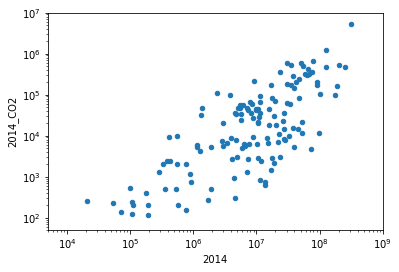

In [57]:
fig, ax = plt.subplots(figsize=(6, 4))
df_all.plot(x='2014', y='2014_CO2', ax=ax, kind='scatter',logx=True,
            logy=True, xlim=[5e3,1e9], ylim=[5e1,1e7])